# Introduction
This motebook includes some tutorial code from the [CausalWorld Documentation - Getting Started](https://causal-world.readthedocs.io/en/latest/guide/getting_started.html#getting-started)

The API of this version (that is used in the causal curiosity repo) is slightly different than the latest official API.  
so in this notebook, we simply make these adaptations to make it run as in the official release of the library

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os

cw_root = './CausalWorld'

In [11]:
# see the list of folders in the library's tutorials folder
[f for f in os.listdir(os.path.join(cw_root,'tutorials')) if os.path.isdir(os.path.join(cw_root,'tutorials',f))]

['requesting_task',
 'curriculums',
 'rlkit',
 'viewing_policies',
 'defining_task',
 'evaluating_model',
 'save_state',
 'using_agents',
 'mpc_w_true_model',
 'get_full_state',
 'change_action_space',
 'stable_baselines',
 'set_start_state',
 'guided_goal_generation',
 'logging_data',
 'priviliged_information',
 'rlpyt',
 'interventions',
 'saving_and_loading']

# Getting Started
The goal of the robot in each of the tasks is to fill a 3d goal shape in the arena with some tool objects available for it to manipulate. Each environment comprises a simulation version of the “TriFinger robot” that has three fingers - each with 3 joints - to learn dexterous object manipulation skills with rigid bodies available in a stage.

We provide some task generators which generates a 3d shape from a specific goal shape distribution which can be rather simple like pushing, picking, pick and place of single objects but can also be much more involved like stacking towers, restoring a certain scene of objects or building structures that require imagination.



In [12]:
from causal_world.envs import CausalWorld
from causal_world.task_generators.task import task_generator as generate_task
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pybullet build time: Aug  3 2020 20:48:16


In [ ]:
task = task_generator(task_generator_id='stacked_blocks')
env = CausalWorld(task=task)
env.reset()
for _ in tqdm(range(200)):
    obs, reward, done, info = env.step(env.action_space.sample())
env.close()

By default you are getting a task that has structured observation space and the low level controller is a joint positions controller. The goal is to solve the task within (the number of objects in the arena multiplied by 10) seconds. All of this is easily customizable as you will learn in one of the many tutorials provided.

## Basics - Controlling environments and tasks
based on the python scripts in `tutorials/requesting_task`

In [13]:
#based on './requesting_task/tutorial_one.py'
"""
This tutorial shows you how to generate a task using one of the task generators
and then using it with the CausalWorld environment.
"""

def requesting_task_1():
    task = generate_task(task_generator_id='creative_stacked_blocks')
    env = CausalWorld(task=task, enable_visualization=True)
    for _ in range(20):     # run 20 episodes
        env.reset()
        for _ in range(200):
            obs, reward, done, info = env.step(env.action_space.sample())
    env.close()

requesting_task_1()


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce GTX 970/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 510.47.03
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 510.47.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce GTX 970/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation
numActiveThreads = 0
stopping threads
destroy semaphore
semaphore destroyed
Thread with taskId 0 exiting
Thread TERMINATED
destro

In [15]:
"""
This tutorial shows you how to generate a task using one of the task generators
and then using it with the CausalWorld environment.
this time, we look at the true state space (not pixels)
"""

def example():
    task = generate_task(task_generator_id='creative_stacked_blocks')
    env = CausalWorld(task=task, enable_visualization=False)     # enable_visualization=True crashes the jupyter kernel
    for i in range(1):
        print(f'episode # {i}')
        env.reset()
        for _ in tqdm(range(200)):
            obs, reward, done, info = env.step(env.action_space.sample())
    env.close()
    print(f'obs shape: {obs.shape}')
    print(f'info: {info}')

example()

episode # 0


  0%|          | 0/200 [00:00<?, ?it/s]

obs shape: (502,)
info: {'desired_goal': array([[[-0.0575, -0.0175,  0.    ],
        [-0.0225,  0.0175,  0.035 ]],

       [[-0.0225, -0.0175,  0.    ],
        [ 0.0125,  0.0175,  0.035 ]],

       [[ 0.0125, -0.0175,  0.    ],
        [ 0.0475,  0.0175,  0.035 ]],

       [[-0.0475, -0.0175,  0.245 ],
        [-0.0125,  0.0175,  0.28  ]],

       [[-0.0125, -0.0175,  0.245 ],
        [ 0.0225,  0.0175,  0.28  ]],

       [[ 0.0225, -0.0175,  0.245 ],
        [ 0.0575,  0.0175,  0.28  ]]]), 'achieved_goal': array([[[-7.41792475e-02, -1.16002297e-01, -1.20611107e-05],
        [-3.20519531e-02, -7.38746695e-02,  3.49892196e-02]],

       [[-3.39628685e-02, -1.24245313e-01, -1.77074933e-05],
        [ 4.58535215e-03, -8.56958419e-02,  3.49902118e-02]],

       [[ 2.81527723e-03, -2.06562510e-01, -1.28986023e-05],
        [ 4.96035236e-02, -1.59771557e-01,  3.49922592e-02]],

       [[-7.35073632e-02,  6.09405755e-02, -2.02214159e-05],
        [-3.41039302e-02,  1.00345538e-01,  3.498247

In [16]:
task = generate_task(task_generator_id='creative_stacked_blocks')
env = CausalWorld(task=task, enable_visualization=False)     # enable_visualization=True crashes the jupyter kernel


In [30]:
env.observation_space.shape
# env._task.get_current_scm_values()

(502,)

**Note**  
Its not clear how we got obs_dim of 502. 
according to the documentation, here's the structure of the observation space:  

Common: 
- time left for task (1), 
- joint_positions (9), 
- joint_velocities (9), 
- end_effector_positions (9)  


Then for each tool object in the environment additional 17-dimensions are used representing: 
- type (1), 
- size (3), 
- cartesian_position (3), 
- quaternion_orientation (4), 
- linear_velocity (3), 
- angular_velocity (3)  
  

For each goal subshape in the environment additional 11-dimesnions are used representing: 
- type (1), 
- size (3), 
- cartesian_position (3) 
- orientation (4)  
  
  
Lastly, if there are any fixed blocks in the environment additional 11-dimesnions are used representing: 
- type (1), 
- size (3), 
- cartesian_position (3) 
- orientation (4).


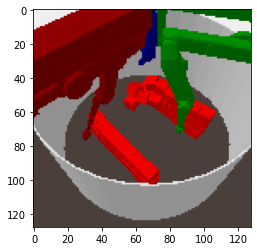

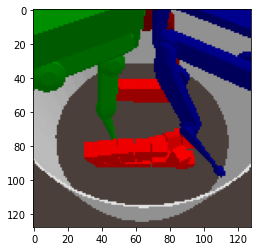

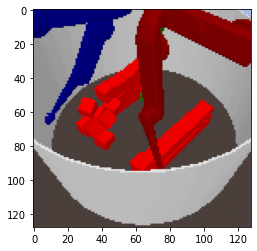

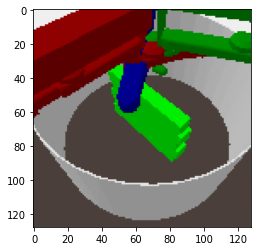

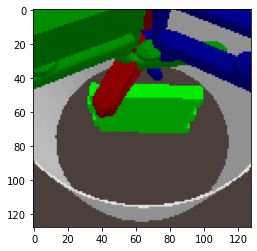

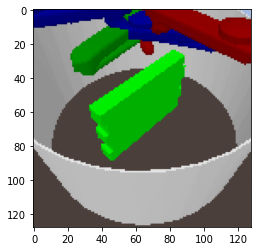

obs shape: (6, 128, 128, 3)
info: {'desired_goal': array([[[-0.1275, -0.0175,  0.    ],
        [-0.0925,  0.0175,  0.035 ]],

       [[-0.0925, -0.0175,  0.    ],
        [-0.0575,  0.0175,  0.035 ]],

       [[-0.0575, -0.0175,  0.    ],
        [-0.0225,  0.0175,  0.035 ]],

       [[-0.0225, -0.0175,  0.    ],
        [ 0.0125,  0.0175,  0.035 ]],

       [[ 0.0125, -0.0175,  0.    ],
        [ 0.0475,  0.0175,  0.035 ]],

       [[ 0.0475, -0.0175,  0.    ],
        [ 0.0825,  0.0175,  0.035 ]],

       [[ 0.0825, -0.0175,  0.    ],
        [ 0.1175,  0.0175,  0.035 ]],

       [[-0.1175, -0.0175,  0.035 ],
        [-0.0825,  0.0175,  0.07  ]],

       [[-0.0825, -0.0175,  0.035 ],
        [-0.0475,  0.0175,  0.07  ]],

       [[-0.0475, -0.0175,  0.035 ],
        [-0.0125,  0.0175,  0.07  ]],

       [[-0.0125, -0.0175,  0.035 ],
        [ 0.0225,  0.0175,  0.07  ]],

       [[ 0.0225, -0.0175,  0.035 ],
        [ 0.0575,  0.0175,  0.07  ]],

       [[ 0.0575, -0.0175,  0.035 ],


In [31]:
"""
This tutorial shows you how to generate a task using one of the task generators
and then using it with the CausalWorld environment but having camera observations
instead of the default structured observations.
"""

def requesting_task_2():
    task = generate_task(task_generator_id='stacked_blocks')
    env = CausalWorld(task=task,
                      skip_frame=10,
                      enable_visualization=False,
                      seed=0,
                      action_mode="joint_positions",
                      observation_mode="pixel",
                      camera_indicies=[0, 1, 2])
    env.reset()
    for _ in range(5):
        obs, reward, done, info = env.step(env.action_space.sample())
    #show last observation's images
    for i in range(6):
        plt.imshow(obs[i])
        plt.show()    
    env.close()
    print(f'obs shape: {obs.shape}')
    print(f'info: {info}')

requesting_task_2()

In [ ]:
"""
requesting_task_3
This tutorial shows you how to solve reaching task using inverse kinemetics
provided in the package internally.
"""

def control_policy(env, obs):
    return \
        env.get_robot().get_joint_positions_from_tip_positions(
            obs[-9:], obs[1:10])


def end_effector_pos():
    task = generate_task(task_generator_id='reaching')
    env = CausalWorld(task=task,
                      enable_visualization=False,
                      action_mode="joint_positions",
                      normalize_actions=False,
                      normalize_observations=False)
    obs = env.reset()
    for _ in range(100):
        goal_dict = env.sample_new_goal()
        success_signal, obs = env.do_intervention(goal_dict)
        obs, reward, done, info = env.step(control_policy(env, obs))
        for _ in range(250):
            obs, reward, done, info = env.step(control_policy(env, obs))
    env.close()

end_effector_pos()

In [48]:
goal_dict = env.sample_new_goal()
goal_dict

{'stack_levels': 4.350039865960824,
 'blocks_mass': 0.0641116413273557,
 'blocks_min_size': 0.07348754180469752,
 'max_level_width': 0.06360661150479517}

In [49]:
env.get_task().current_blocks_min_size

0.03575159201745421

In [50]:
success_signal, obs = env.do_intervention(goal_dict)
success_signal

True

In [56]:
env.get_state()

{'pybullet_state': {'full': 1,
  'latest_full_state': {'positions': array([-0.01355939,  0.72233115, -0.67128814, -0.01355939,  0.72233115,
          -0.67128814, -0.01355939,  0.72233115, -0.67128814]),
   'velocities': array([-0.5582615 , -2.61650253,  4.77390781, -0.5582615 , -2.61650253,
           4.77390781, -0.5582615 , -2.61650253,  4.77390781]),
   'torques': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
   'end_effector_positions': array([-0.05565027,  0.15944501,  0.04838538,  0.16590856, -0.03152796,
           0.04838538, -0.11025829, -0.12791705,  0.04838538])}},
 'control_index': -1}

## Performing Interventions

In [ ]:
"""
interventions_1
This tutorial shows you how to perform a random intervention on one of the
variables in the environment.
"""
def intervention_1():
    task = generate_task(task_generator_id='picking')
    env = CausalWorld(task=task, enable_visualization=False)
    env.reset()
    for _ in range(50):
        random_intervention_dict, success_signal, obs = \
            env.do_single_random_intervention()
        print("The random intervention performed is ",
              random_intervention_dict)
        for i in range(100):
            obs, reward, done, info = env.step(env.action_space.sample())
    env.close()

intervention_1()

In [ ]:
task = generate_task(task_generator_id='picking')
env = CausalWorld(task=task, enable_visualization=False)

the method `task.do_single_random_intervention` checks which `variables_space` we're using and randomly choose a variable name from it 

In [71]:
print(env._task._task_params['variables_space'])
env._task.get_intervention_space_a_b()


space_a_b


{'joint_positions': array([[-1.57, -1.2 , -3.  , -1.57, -1.2 , -3.  , -1.57, -1.2 , -3.  ],
        [ 1.  ,  1.57,  3.  ,  1.  ,  1.57,  3.  ,  1.  ,  1.57,  3.  ]]),
 'tool_level_0_num_0': {'cylindrical_position': array([[ 0.        , -3.14159265,  0.03674377],
         [ 0.15      ,  3.14159265,  0.3       ]]),
  'euler_orientation': array([[ 0.        ,  0.        , -3.14159265],
         [ 0.        ,  0.        ,  3.14159265]]),
  'color': array([[0., 0., 0.],
         [1., 1., 1.]]),
  'mass': array([0.015, 0.2  ])},
 'tool_level_1_num_0': {'cylindrical_position': array([[ 0.        , -3.14159265,  0.03674377],
         [ 0.15      ,  3.14159265,  0.3       ]]),
  'euler_orientation': array([[ 0.        ,  0.        , -3.14159265],
         [ 0.        ,  0.        ,  3.14159265]]),
  'color': array([[0., 0., 0.],
         [1., 1., 1.]]),
  'mass': array([0.015, 0.2  ])},
 'tool_level_2_num_0': {'cylindrical_position': array([[ 0.        , -3.14159265,  0.03674377],
         [ 0.

**Questions**:
1. what is 'stage' in the task parameters ?
1. what is the 'floor' in the task parameters ?

In [63]:
random_intervention_dict, success_signal, obs = env.do_single_random_intervention()
random_intervention_dict

{'floor_friction': 0.7720617597177273}

In [64]:
env.get_intervention_space_a()

{'joint_positions': array([[-1.57, -1.2 , -3.  , -1.57, -1.2 , -3.  , -1.57, -1.2 , -3.  ],
        [-0.69,  0.  ,  0.  , -0.69,  0.  ,  0.  , -0.69,  0.  ,  0.  ]]),
 'tool_level_0_num_0': {'cylindrical_position': array([[ 0.        , -3.14159265,  0.03674377],
         [ 0.11      ,  3.14159265,  0.15      ]]),
  'euler_orientation': array([[ 0.        ,  0.        , -3.14159265],
         [ 0.        ,  0.        ,  3.14159265]]),
  'color': array([[0.5, 0.5, 0.5],
         [1. , 1. , 1. ]]),
  'mass': array([0.015, 0.045])},
 'tool_level_1_num_0': {'cylindrical_position': array([[ 0.        , -3.14159265,  0.03674377],
         [ 0.11      ,  3.14159265,  0.15      ]]),
  'euler_orientation': array([[ 0.        ,  0.        , -3.14159265],
         [ 0.        ,  0.        ,  3.14159265]]),
  'color': array([[0.5, 0.5, 0.5],
         [1. , 1. , 1. ]]),
  'mass': array([0.015, 0.045])},
 'tool_level_2_num_0': {'cylindrical_position': array([[ 0.        , -3.14159265,  0.03674377],
 

In [73]:
"""
interventions_2
This tutorial shows you how to control the allowed space for interventions
"""


def without_intervention_split():
    print('='*20,'No intervention split','='*20)
    task = generate_task(task_generator_id='pushing')
    env = CausalWorld(task=task, enable_visualization=False)
    env.reset()
    for _ in range(2):
        for i in range(200):
            obs, reward, done, info = env.step(env.action_space.sample())
        success_signal, obs = env.do_intervention(
            {'stage_color': np.random.uniform(0, 1, [
                3,
            ])})
        print("Intervention success signal", success_signal)
    env.close()


def with_intervention_split_1():
    print('='*20,'intervention split 1 ','='*20)
    task = generate_task(task_generator_id='pushing',
                          variables_space='space_a')
    env = CausalWorld(task=task, enable_visualization=False)
    env.reset()
    for _ in range(2):
        for i in range(200):
            obs, reward, done, info = env.step(env.action_space.sample())
        success_signal, obs = env.do_intervention(
            {'stage_color': np.random.uniform(0, 1, [
                3,
            ])})
        print("Intervention success signal", success_signal)
    env.close()


def with_intervention_split_2():
    print('='*20,'intervention split 2 ','='*20)
    task = generate_task(task_generator_id='pushing',
                          variables_space='space_b')
    env = CausalWorld(task=task, enable_visualization=False)
    interventions_space = task.get_intervention_space_a()
    env.reset()
    for _ in range(2):
        for i in range(200):
            obs, reward, done, info = env.step(env.action_space.sample())
        success_signal, obs = env.do_intervention({
            'stage_color':
                np.random.uniform(interventions_space['stage_color'][0],
                                  interventions_space['stage_color'][1])
        })
        print("Intervention success signal", success_signal)
    env.close()


def with_intervention_split_3():
    print('='*20,'intervention split 3 ','='*20)
    task = generate_task(task_generator_id='pushing',
                          variables_space='space_b')
    env = CausalWorld(task=task, enable_visualization=False)
    interventions_space = task.get_intervention_space_b()
    env.reset()
    for _ in range(2):
        for i in range(200):
            obs, reward, done, info = env.step(env.action_space.sample())
        success_signal, obs = env.do_intervention({
            'stage_color':
                np.random.uniform(interventions_space['stage_color'][0],
                                  interventions_space['stage_color'][1])
        })
        print("Intervention success signal", success_signal)
    env.close()


without_intervention_split()
with_intervention_split_1()
with_intervention_split_2()
with_intervention_split_3()


==================== No intervention split ====================
Intervention success signal True
Intervention success signal True
==================== intervention split 1  ====================


Intervention success signal False


Intervention success signal False
==================== intervention split 2  ====================


Intervention success signal False


Intervention success signal False
==================== intervention split 2  ====================
Intervention success signal True
Intervention success signal True


In [75]:
# %load ./CausalWorld/tutorials/interventions/tutorial_three.py
"""
intervention_3
This tutorial shows you how to sample new goals by intervening
on the environment.
"""
def goal_interventions():
    task = generate_task(task_generator_id='stacked_blocks')
    env = CausalWorld(task=task, enable_visualization=True)
    env.reset()
    for e in range(10):
        print('-'*10,f'episode {e}','-'*10)
        for i in tqdm(range(200)):
            obs, reward, done, info = env.step(env.action_space.sample())
        goal_intervention_dict = env.sample_new_goal()
        print("new goal chosen: ", goal_intervention_dict)
        success_signal, obs = env.do_intervention(goal_intervention_dict)
        print("Goal Intervention success signal", success_signal)
    env.close()


goal_interventions()

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce GTX 970/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 510.47.03
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 510.47.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce GTX 970/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation
---------- episode 0 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 4.841694527491273, 'blocks_mass': 0.06291136198234516, 'blocks_min_size': 0.05911053504286576, 'max_level_width': 0.09766156604464314}
Goal Intervention success signal True
---------- episode 1 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 7.918616866414583, 'blocks_mass': 0.026122688644881684, 'blocks_min_size': 0.04335507024379339, 'max_level_width': 0.05355059455677457}
Goal Intervention success signal True
---------- episode 2 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 3.0879762816922156, 'blocks_mass': 0.05419789464207589, 'blocks_min_size': 0.05863491044992693, 'max_level_width': 0.10104740361770156}
Goal Intervention success signal True
---------- episode 3 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 6.555883923501945, 'blocks_mass': 0.03343548128362281, 'blocks_min_size': 0.04881406722787611, 'max_level_width': 0.14172934874854293}
Goal Intervention success signal True
---------- episode 4 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 6.018017768348156, 'blocks_mass': 0.04376358216843762, 'blocks_min_size': 0.057616852474340355, 'max_level_width': 0.056077181164619044}
Goal Intervention success signal True
---------- episode 5 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 5.704334651477401, 'blocks_mass': 0.03472203259117068, 'blocks_min_size': 0.05182157866720394, 'max_level_width': 0.09909741100225045}
Goal Intervention success signal True
---------- episode 6 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 5.452427388129989, 'blocks_mass': 0.03440121640278257, 'blocks_min_size': 0.04142155289941026, 'max_level_width': 0.12658501956949314}
Goal Intervention success signal True
---------- episode 7 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 4.882814660629933, 'blocks_mass': 0.037223091195177783, 'blocks_min_size': 0.06326298825091915, 'max_level_width': 0.08270853997335986}
Goal Intervention success signal True
---------- episode 8 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 7.774562702589513, 'blocks_mass': 0.052813094100165325, 'blocks_min_size': 0.04599294279470387, 'max_level_width': 0.10310649815761123}
Goal Intervention success signal True
---------- episode 9 ----------


  0%|          | 0/200 [00:00<?, ?it/s]

new goal chosen:  {'stack_levels': 7.355129160480282, 'blocks_mass': 0.029613827979208595, 'blocks_min_size': 0.06144470046032398, 'max_level_width': 0.08563033157539156}
Goal Intervention success signal True
numActiveThreads = 0
stopping threads
destroy semaphore
Thread with taskId 0 exiting
Thread TERMINATED
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
destroy semaphore
semaphore destroyed
Thread with taskId 0 exiting
Thread TERMINATED
destroy main semaphore
main semaphore destroyed


In [79]:
# %load ./CausalWorld/tutorials/interventions/tutorial_four.py
"""
interventions_4
This tutorial shows you how to use privileged information to solve the
task at hand.
"""

def privileged_information():
    task = generate_task(task_generator_id='general')
    env = CausalWorld(task=task, enable_visualization=True)
    env.expose_potential_partial_solution()
    env.reset()
    for e in range(10):
        print('-'*10,f'episode {e+1}/10','-'*10)
        goal_intervention_dict = env.sample_new_goal()
        success_signal, obs = env.do_intervention(goal_intervention_dict)
        print("Goal Intervention success signal", success_signal)
        for i in range(100):
            obs, reward, done, info = env.step(env.action_space.low)
        print("fractional_success is:", info['fractional_success'])
        print("now we solve it with privileged info")
        success_signal, obs = env.do_intervention(
            info['possible_solution_intervention'], check_bounds=False)
        print("Partial Solution Setting Intervention Succes Signal",
              success_signal)
        for i in range(100):
            obs, reward, done, info = env.step(env.action_space.low)    # how does this action solve the problem ???
        print("fractional_success is:", info['fractional_success'])
    env.close()



privileged_information()


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce GTX 970/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 510.47.03
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 510.47.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce GTX 970/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation
---------- episode 1/10 ----------
Goal Intervention success signal True
fractional_success is: 0.3773368786177418
now we solve i

In [81]:
# %load ./CausalWorld/tutorials/interventions/tutorial_five.py
"""
This tutorial shows you how to intervene on the default starting state,
"""
import numpy as np


def example():
    task = generate_task(task_generator_id='picking')
    env = CausalWorld(task=task, enable_visualization=True)
    env.set_starting_state(
        {'goal_block': {
            'cartesian_position': [0.1, 0.1, 0.1]
        }})
    print('episode 1')
    for _ in range(500):
        obs, reward, done, info = env.step(env.action_space.sample())
    print('now we call reset_default_state')
    env.reset_default_state()
    print('episode 2')
    for _ in range(500):
        obs, reward, done, info = env.step(env.action_space.sample())
    print('now we do env.reset()')
    env.reset()
    print('and doing episode 3:')
    for _ in range(500):
        obs, reward, done, info = env.step(env.action_space.sample())
    env.close()


if __name__ == '__main__':
    example()


picking
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce GTX 970/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 510.47.03
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 510.47.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce GTX 970/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation


episode 1
now we call reset_default_state
episode 1
now we do env.reset()
and doing episode 3:
numActiveThreads = 0
stopping threads
destroy semaphore
semaphore destroyed
Thread with taskId 0 exiting
Thread TERMINATED
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


In [82]:
# %load ./CausalWorld/tutorials/interventions/tutorial_six.py
"""
This tutorial shows you how to use the intervention space is sampling an intervention
"""

from causal_world.envs.causalworld import CausalWorld
from causal_world.task_generators.task import generate_task
import numpy as np


def example():
    task = generate_task(task_generator_id='pick_and_place')
    env = CausalWorld(task=task, enable_visualization=True)
    env.reset()
    intervention_space = env.get_variable_space_used()
    for _ in range(100):
        for i in range(200):
            obs, reward, done, info = env.step(env.action_space.low)
        intervention = {'tool_block': {'size': np.random.uniform(intervention_space['tool_block']['size'][0],
                                                                 intervention_space['tool_block']['size'][1])}}
        env.do_intervention(intervention)
    env.close()


if __name__ == '__main__':
    example()

